In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re
import random

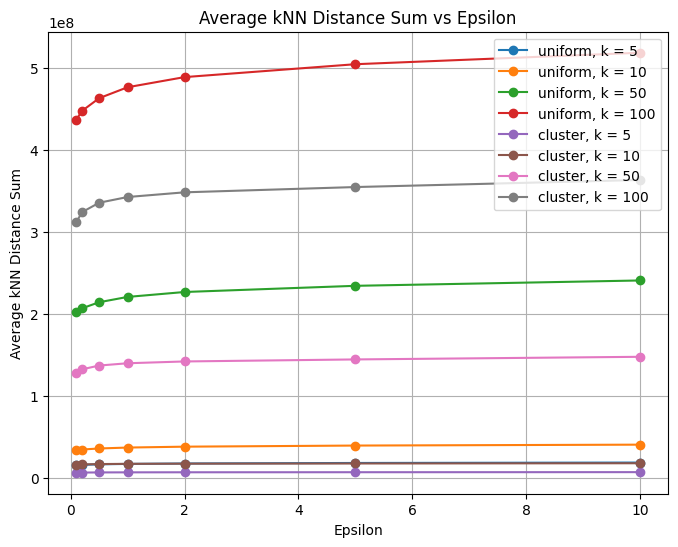

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# 파일 로드
file_paths = sorted(glob.glob("dist_*.txt"))  # 파일명 기준 정렬
epsVals = [10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1]
kVals = [5, 10, 50, 100]
numQueries = 100.0
numFilesPerType = 5
numDataPerFile = 10

uniformDistArray = [[0.0 for j in range(len(epsVals))] for i in range(len(kVals))]
clusterDistArray = [[0.0 for j in range(len(epsVals))] for i in range(len(kVals))]
# print(file_paths)

uniform = True

# 파일별로 데이터 읽고 처리
for file_path in file_paths:
    # print("read ", file_path, "\n")
    
    with open(file_path, "r") as f:
        lines = f.readlines()

    # for i, line in enumerate(lines):

    index = 0
    
    while index < len(lines):
    # while index < 100:
        if lines[index].startswith('e'):
            val = float(lines[index].split()[1])
            
            for j, eps in enumerate(epsVals):
                if abs(eps - val) < 0.01:
                    epsIndex = j
                    break
            
            for j in range(index+1, index+1+len(kVals)):
                parts = lines[j].split()

                # print(parts)
                
                dist = parts[0]

                # print(dist)
                
                # if main_string.find(search_string) != -1:
                pos = dist.find('e')
                if pos != -1:
                    dist = float(dist[:pos])* pow(10, int(dist[len(dist)-1]))
                else:
                    dist = float(dist)

                if uniform:
                # print(epsIndex, j - (index+1))
                    uniformDistArray[j - (index+1)][epsIndex] += dist
                else:
                    clusterDistArray[j - (index+1)][epsIndex] += dist

            index += 1 + len(kVals)
            # print(index)
            
        elif lines[index].startswith('cluster'):
            uniform = False
            index += 1
        
        else:
            index += 1
            # print(index)


for sameEpsArray in uniformDistArray:
    for val in sameEpsArray:
        val /= (numQueries * numDataPerFile * numFilesPerType)

for sameEpsArray in clusterDistArray:
    for val in sameEpsArray:
        val /= (numQueries * numDataPerFile * numFilesPerType)

# 플로팅
plt.figure(figsize=(8, 6))

for i, sameEpsArray in enumerate(uniformDistArray):
    plt.plot(epsVals, sameEpsArray, marker="o", linestyle="-", label= "uniform, k = " + str(kVals[i]))

for i, sameEpsArray in enumerate(clusterDistArray):
    plt.plot(epsVals, sameEpsArray, marker="o", linestyle="-", label= "cluster, k = " + str(kVals[i]))

plt.xlabel("Epsilon")
plt.ylabel("Average kNN Distance Sum")
plt.title("Average kNN Distance Sum vs Epsilon")
plt.grid(True)
plt.legend()
plt.show()

plt.savefig("plot_dist.png")

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# 파일 로드
file_paths = sorted(glob.glob("speed_*.txt"))  # 파일명 기준 정렬
epsilon = 1.0
k = 10
# sizes = [20000, 50000, 100000, 200000]
numQueries = 1000
numDataPerFile = 10
numFiles = 5

uniformSpeed = 0.0
clusterSpeed = 0.0
# uniformSpeedArray = [0.0 for i in range(len(sizes))]
# clusterSpeedArray = [0.0 for i in range(len(sizes))]
# print(file_paths)

uniform = True

# 파일별로 데이터 읽고 처리
for file_path in file_paths:
    # print("read ", file_path, "\n")
    
    with open(file_path, "r") as f:
        lines = f.readlines()

    # for i, line in enumerate(lines):

    if lines[0].startswith('cluster'):
        uniform = False
    elif lines[0].startswith('uniform'):
        uniform = True
    else:
        raise ValueError("first line should be cluster or uniform")
    
    index = 1
    
    while index < len(lines):
    # while index < 100:
        if lines[index].startswith('numPoints'):
            for j, size in enumerate(sizes):
                if size == int(lines[index].split()[1].strip(',')):
                    i = j
                    break
            
            if uniform:
                uniformSpeed += float(lines[index+1].split()[1])
                # uniformSpeedArray[i] += float(lines[index+1].split()[1])
            else:
                clusterSpeed += float(lines[index+1].split()[1])
                # clusterSpeedArray[i] += float(lines[index+1].split()[1])

            index += 2
            
        else:
            index += 1

uniformSpeed /= numDataPerFile * numFiles
print(uniformSpeed, 'ms')

clusterSpeed /= numDataPerFile * numFiles
print(clusterSpeed, 'ms')

29.467992820000003 ms
31.114416000000006 ms
